# Forest Fire Prediction

![Img_2](/data/Images/Forest_Fire_4.jpg)

# Attribute Information:

* month : month of the year: ‘jan’ to ‘dec’ encoded with 1 to 12

* FFMC : FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
           * The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. his code is an indicator of the relative ease of ignition and the flammability of fine fuel.

* DMC : DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3
            * The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended.

* DC : DC (Drought Code) index from the FWI system: 7.9 to 860.6
             * The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels

* ISI : ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
              * The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread

* RH : relative humidity in %: 15.0 to 100
               * Relative humidity is an indicator of the percentage of moisture in the air at the prevailing temperature

* FFMC	function(temp,rain,rh,wind,ffmc0)	          
* ISI	function(FFMC, wind)
* DMC	function(temp,rain,rh,month,dmc0)	
* BUI	function(DC, DMC)
* DC	function(temp,rain,month,dc0)	
* FWI	function(ISI, BUI)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.figure_factory as ff
plt.style.use('seaborn')
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

style = {'description_width': 'initial'}

In [2]:
df = pd.read_csv("D:/Datasets/forestfires (1).csv")

In [3]:
df

,month;FFMC;DMC;DC;ISI;temp;RH;wind;class
0,3;86.2;26.2;94.3;5.1;8.2;51;6.7;0
1,10;90.6;35.4;669.1;6.7;18;33;0.9;0
2,10;90.6;43.7;686.9;6.7;14.6;33;1.3;0
3,3;91.7;33.3;77.5;9;8.3;97;4;0
4,3;89.3;51.3;102.2;9.6;11.4;99;1.8;0
...,...
510,8;81.6;56.7;665.6;1.9;27.8;32;2.7;1
511,8;81.6;56.7;665.6;1.9;21.9;71;5.8;1
512,8;81.6;56.7;665.6;1.9;21.2;70;6.7;1
513,8;94.4;146;614.7;11.3;25.6;42;4;0


* Data is seperated using regex

In [4]:
df[['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'class']] = df['month;FFMC;DMC;DC;ISI;temp;RH;wind;class'].str.split(';', expand=True)

In [5]:
df

,month;FFMC;DMC;DC;ISI;temp;RH;wind;class,month,FFMC,DMC,DC,ISI,temp,RH,wind,class
0,3;86.2;26.2;94.3;5.1;8.2;51;6.7;0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0
1,10;90.6;35.4;669.1;6.7;18;33;0.9;0,10,90.6,35.4,669.1,6.7,18,33,0.9,0
2,10;90.6;43.7;686.9;6.7;14.6;33;1.3;0,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0
3,3;91.7;33.3;77.5;9;8.3;97;4;0,3,91.7,33.3,77.5,9,8.3,97,4,0
4,3;89.3;51.3;102.2;9.6;11.4;99;1.8;0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0
...,...,...,...,...,...,...,...,...,...,...
510,8;81.6;56.7;665.6;1.9;27.8;32;2.7;1,8,81.6,56.7,665.6,1.9,27.8,32,2.7,1
511,8;81.6;56.7;665.6;1.9;21.9;71;5.8;1,8,81.6,56.7,665.6,1.9,21.9,71,5.8,1
512,8;81.6;56.7;665.6;1.9;21.2;70;6.7;1,8,81.6,56.7,665.6,1.9,21.2,70,6.7,1
513,8;94.4;146;614.7;11.3;25.6;42;4;0,8,94.4,146,614.7,11.3,25.6,42,4,0


In [6]:
df.drop(['month;FFMC;DMC;DC;ISI;temp;RH;wind;class'], axis=1, inplace=True)

* So the final data is in the format

In [7]:
df

,month,FFMC,DMC,DC,ISI,temp,RH,wind,class
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0
1,10,90.6,35.4,669.1,6.7,18,33,0.9,0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0
3,3,91.7,33.3,77.5,9,8.3,97,4,0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0
...,...,...,...,...,...,...,...,...,...
510,8,81.6,56.7,665.6,1.9,27.8,32,2.7,1
511,8,81.6,56.7,665.6,1.9,21.9,71,5.8,1
512,8,81.6,56.7,665.6,1.9,21.2,70,6.7,1
513,8,94.4,146,614.7,11.3,25.6,42,4,0


In [8]:
df.describe()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,class
count,515,515,515,515,515,515,515,515,515
unique,12,105,214,218,119,192,75,21,2
top,8,92.1,99,745.3,9.6,19.6,27,3.1,1
freq,184,28,10,10,23,8,33,53,269


In [9]:
for i in df.columns:
    df[i] = df[i].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   515 non-null    float64
 1   FFMC    515 non-null    float64
 2   DMC     515 non-null    float64
 3   DC      515 non-null    float64
 4   ISI     515 non-null    float64
 5   temp    515 non-null    float64
 6   RH      515 non-null    float64
 7   wind    515 non-null    float64
 8   class   515 non-null    float64
dtypes: float64(9)
memory usage: 36.3 KB


In [11]:
df.corr

<bound method DataFrame.corr of      month  FFMC    DMC     DC   ISI  temp    RH  wind  class
0      3.0  86.2   26.2   94.3   5.1   8.2  51.0   6.7    0.0
1     10.0  90.6   35.4  669.1   6.7  18.0  33.0   0.9    0.0
2     10.0  90.6   43.7  686.9   6.7  14.6  33.0   1.3    0.0
3      3.0  91.7   33.3   77.5   9.0   8.3  97.0   4.0    0.0
4      3.0  89.3   51.3  102.2   9.6  11.4  99.0   1.8    0.0
..     ...   ...    ...    ...   ...   ...   ...   ...    ...
510    8.0  81.6   56.7  665.6   1.9  27.8  32.0   2.7    1.0
511    8.0  81.6   56.7  665.6   1.9  21.9  71.0   5.8    1.0
512    8.0  81.6   56.7  665.6   1.9  21.2  70.0   6.7    1.0
513    8.0  94.4  146.0  614.7  11.3  25.6  42.0   4.0    0.0
514   11.0  79.5    3.0  106.7   1.1  11.8  31.0   4.5    0.0

[515 rows x 9 columns]>

In [12]:
df['month'].value_counts()

8.0     184
9.0     171
3.0      54
7.0      32
2.0      20
6.0      16
10.0     15
4.0       9
12.0      9
1.0       2
5.0       2
11.0      1
Name: month, dtype: int64

In [13]:
# list of the months
list_1 = [8, 9, 3, 7, 2, 6, 10, 4, 12, 1, 5, 11]

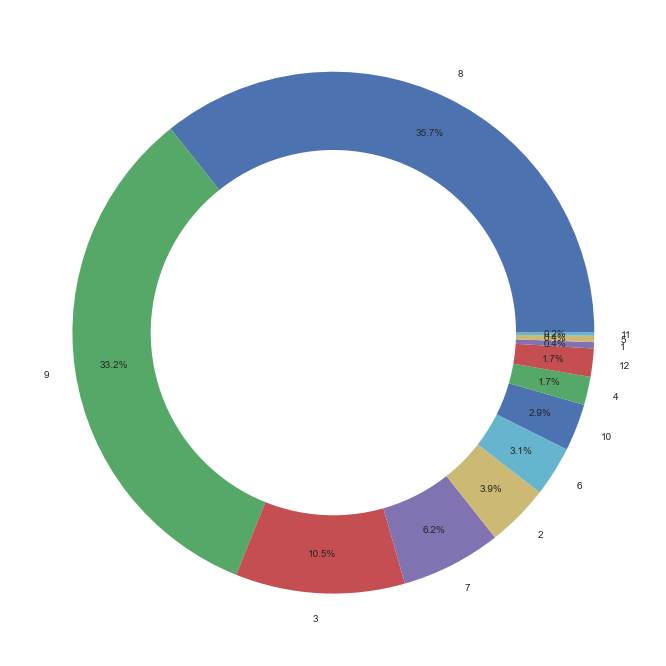

In [14]:
# Data Points Captured as per month
figure(figsize=(20, 12))
# explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(df['month'].value_counts(), labels=list_1,
        autopct='%1.1f%%', pctdistance=0.85)
donut_plot = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut_plot)

In [15]:
df.columns

Index(['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'class'], dtype='object')

In [16]:
# Ipywidgets will create a dropdown of the columns
wig_col_1 = widgets.Dropdown(
                options=[col for col in df.columns.tolist() if col.startswith(('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'class'))],
                description='Choose a Column to Plot ',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

Dropdown(description='Choose a Column to Plot ', layout=Layout(height='40px', width='40%'), options=('FFMC', '…

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

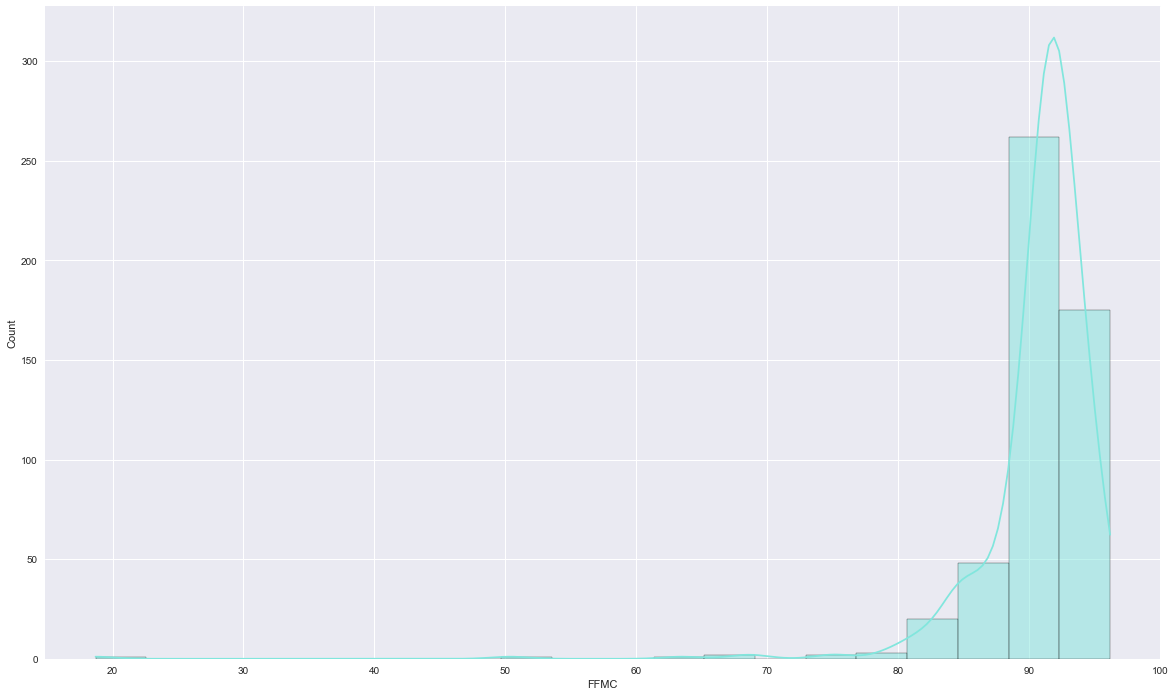

In [17]:
figure(figsize=(20, 12))
display(wig_col_1)

#sns.kdeplot(wig_col_1.value,  data=df, color="#81e6dd")
sns.histplot(data=df[wig_col_1.value], color="#81e6dd", kde=True, bins=20)

In [18]:
x = df.iloc[:, :-1].values # All dataset Except last column which are the independent varible 
y = df.iloc[:, -1].values # Last Column which is dependent varible

In [19]:
x

array([[  3. ,  86.2,  26.2, ...,   8.2,  51. ,   6.7],
       [ 10. ,  90.6,  35.4, ...,  18. ,  33. ,   0.9],
       [ 10. ,  90.6,  43.7, ...,  14.6,  33. ,   1.3],
       ...,
       [  8. ,  81.6,  56.7, ...,  21.2,  70. ,   6.7],
       [  8. ,  94.4, 146. , ...,  25.6,  42. ,   4. ],
       [ 11. ,  79.5,   3. , ...,  11.8,  31. ,   4.5]])

In [20]:
# Slider for changing test size of a function
test_size = widgets.FloatSlider(min=0.05, max=0.3, value=0.05, step=0.05, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.05, description='Test Size :', max=0.3, min=0.05, step=0.05)

In [21]:
# Spliting Data to main two parts which are the train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size.value, random_state=0)

In [22]:
# Feature Scaling is applied for the independent varible to be in range
#sc=StandardScaler()

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [24]:
# Passing Data from standard scaler
x_train = sc.fit_transform(x_train)

In [25]:
x_test

array([[7.000e+00, 9.390e+01, 1.697e+02, 4.118e+02, 1.230e+01, 2.340e+01,
        4.000e+01, 6.300e+00],
       [8.000e+00, 9.140e+01, 1.424e+02, 6.014e+02, 1.060e+01, 1.980e+01,
        3.900e+01, 5.400e+00],
       [1.000e+01, 9.000e+01, 4.150e+01, 6.826e+02, 8.700e+00, 1.130e+01,
        6.000e+01, 5.400e+00],
       [9.000e+00, 9.090e+01, 1.265e+02, 6.865e+02, 7.000e+00, 1.470e+01,
        7.000e+01, 3.600e+00],
       [7.000e+00, 9.070e+01, 8.090e+01, 3.683e+02, 1.680e+01, 1.480e+01,
        7.800e+01, 8.000e+00],
       [8.000e+00, 9.020e+01, 9.690e+01, 6.242e+02, 8.900e+00, 1.470e+01,
        5.900e+01, 5.800e+00],
       [4.000e+00, 8.190e+01, 3.000e+00, 7.900e+00, 3.500e+00, 1.340e+01,
        7.500e+01, 1.800e+00],
       [9.000e+00, 9.330e+01, 1.412e+02, 7.139e+02, 1.390e+01, 2.290e+01,
        4.400e+01, 5.400e+00],
       [8.000e+00, 9.310e+01, 1.573e+02, 6.667e+02, 1.350e+01, 2.400e+01,
        3.600e+01, 3.100e+00],
       [9.000e+00, 9.250e+01, 1.211e+02, 6.744e+02, 8.6

In [26]:
# Passing Data from Standard scaler
x_test = sc.transform(x_test)

In [27]:
# Now the Data is in range
x_train

array([[0.63636364, 0.99741935, 0.56133701, ..., 0.91961415, 0.17647059,
        0.5       ],
       [0.72727273, 0.93290323, 0.44245348, ..., 0.53376206, 0.29411765,
        0.2       ],
       [0.72727273, 0.95096774, 0.36078567, ..., 0.7266881 , 0.15294118,
        0.15555556],
       ...,
       [0.72727273, 0.95225806, 0.29944866, ..., 0.66237942, 0.29411765,
        0.4       ],
       [0.72727273, 0.95225806, 0.41660924, ..., 0.48553055, 0.35294118,
        0.4       ],
       [0.63636364, 0.98193548, 0.36940041, ..., 0.72025723, 0.08235294,
        0.45555556]])

In [28]:
x_test

array([[ 0.54545455,  0.97032258,  0.58097864,  0.4728063 ,  0.21925134,
         0.68167203,  0.29411765,  0.65555556],
       [ 0.63636364,  0.93806452,  0.48690558,  0.69552449,  0.18894831,
         0.5659164 ,  0.28235294,  0.55555556],
       [ 0.81818182,  0.92      ,  0.13921433,  0.79090802,  0.15508021,
         0.2926045 ,  0.52941176,  0.55555556],
       [ 0.72727273,  0.9316129 ,  0.43211578,  0.79548925,  0.12477718,
         0.40192926,  0.64705882,  0.35555556],
       [ 0.54545455,  0.92903226,  0.27498277,  0.42170798,  0.29946524,
         0.40514469,  0.74117647,  0.84444444],
       [ 0.63636364,  0.92258065,  0.33011716,  0.72230706,  0.15864528,
         0.40192926,  0.51764706,  0.6       ],
       [ 0.27272727,  0.81548387,  0.00654721, -0.00164454,  0.06238859,
         0.36012862,  0.70588235,  0.15555556],
       [ 0.72727273,  0.96258065,  0.4827705 ,  0.82767532,  0.24777184,
         0.66559486,  0.34117647,  0.55555556],
       [ 0.63636364,  0.96      

# Bayes theorem

* Bayes Theorem describes the probability of an event, based on prior knowledge of conditions be related of conditions to the event. So it basically fits perfectly for machine learning, because that is exactly what machine learning does: making predictions for the future based on prior experience. Mathematically you can write the Bayes theorem as following:

![formula_3](/data/Images/formula_3.jpg)
![formula_2](/data/Images/formula_2.jpg)

![formula_1](/data/Images/Navie.png)

In [29]:
# Navie Bayers 
gnb = GaussianNB()

In [30]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [31]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1.])

In [32]:
y_pred

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

<AxesSubplot:>

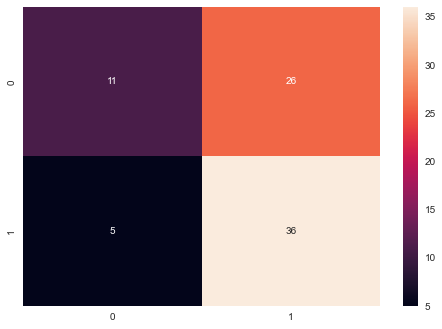

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [34]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  11

True Negatives(TN) =  36

False Positives(FP) =  26

False Negatives(FN) =  5


In [38]:
accuracy_score(y_pred, y_test)

0.6025641025641025

In [39]:
gnb_acc = [0.50, 0.57, 0.60, 0.59, 0.57, 0.58]
test_size_gnb = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

C:\Users\saipr\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

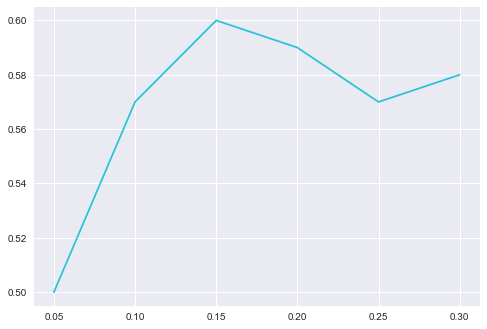

In [40]:
sns.lineplot(test_size_gnb, gnb_acc, color='#27c4d9')